In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# 1. Read in synonymous score data


In [9]:
src1 = pd.read_csv('../raw_data/main_synonymous_scores_single_rep1.tsv', sep = '\t', index_col = 0)
src2 = pd.read_csv('../raw_data/main_synonymous_scores_single_rep2.tsv', sep = '\t', index_col = 0)

# Add rep identifier to columns
cols = src1.columns.tolist()
cols1 = [label + '_1' for label in cols]
cols = src2.columns.tolist()
cols2 = [label + '_2' for label in cols] 

# Rename columns with rep identifier
src1 = src1.rename(columns = dict(zip(cols, cols1)))
src2 = src2.rename(columns = dict(zip(cols, cols2)))

# Combine DataFrames
srcBothReps = src1.join(src2)

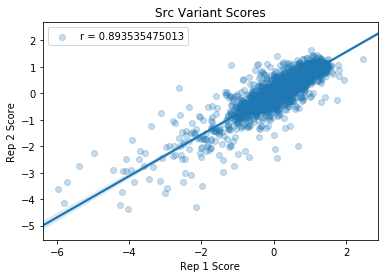

In [4]:
# Separate scores by reps
score1 = srcBothReps.loc[:, 'score_1'].values
score2 = srcBothReps.loc[:, 'score_2'].values

idx = np.isfinite(score1) & np.isfinite(score2)
score1 = score1[idx]
score2 = score2[idx]

r = np.corrcoef(score1, score2)
sns.regplot(score1, score2, scatter_kws = {'alpha':0.25}, label = 'r = ' + str(r[0,1]))
plt.xlabel('Rep 1 Score')
plt.ylabel('Rep 2 Score')
plt.title('Src Variant Scores')
plt.legend()
plt.show()